---
title: "Logistic Regression Workflow"
author: "Deri Siswara"
format: html
toc: true
---

In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Load Data
data = pd.read_csv("diabetes.csv")
data = data[["Glucose", "BloodPressure", "Outcome"]]
data["Outcome"] = data["Outcome"].apply(lambda x: "diabetes" if x==1 else "not diabetes")

data.head()

,Glucose,BloodPressure,Outcome
0,148,72,diabetes
1,85,66,not diabetes
2,183,64,diabetes
3,89,66,not diabetes
4,137,40,diabetes


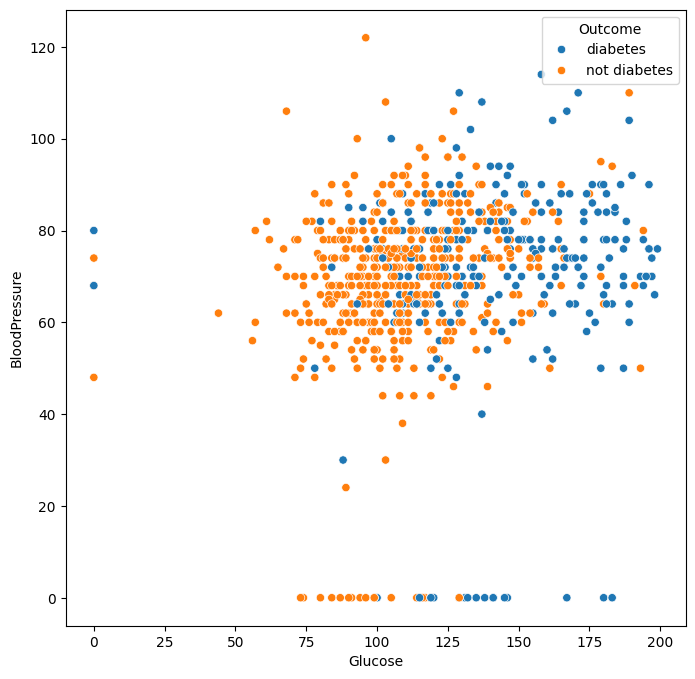

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data,
                ax = ax)

plt.show()

In [10]:
# Hapus data glucose == 0 & bloodpressure = 0
condition_1 = data["Glucose"] > 0
condition_2 = data["BloodPressure"] > 0

data = data[condition_1 & condition_2]

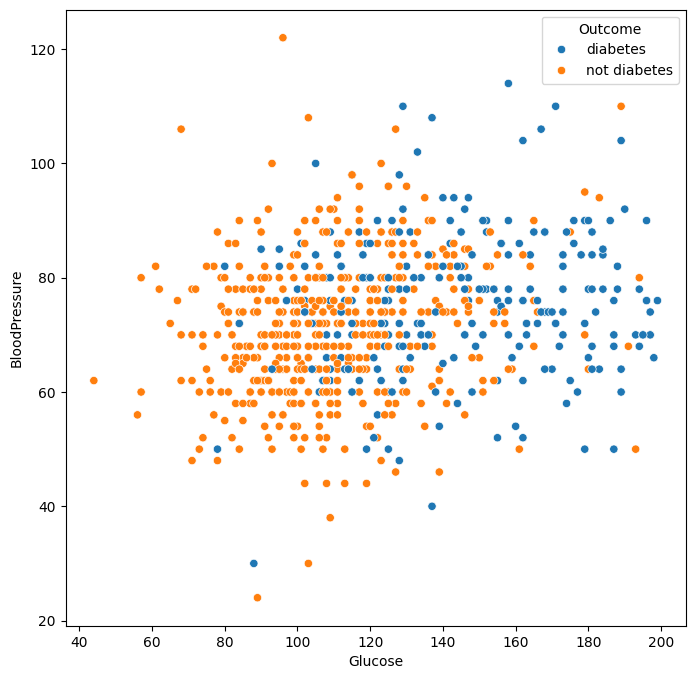

In [11]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data,
                ax = ax)

plt.show()

In [12]:
data["Outcome"].value_counts(normalize = True)

Outcome
not diabetes    0.656593
diabetes        0.343407
Name: proportion, dtype: float64

In [13]:
# Buat input & output
X = data.drop(columns = "Outcome")
y = data["Outcome"]

In [14]:
# Split train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y, #  stratify sampling karena y imbalance 
                                                    random_state = 123)


In [15]:
y_train.value_counts(), y_train.value_counts(normalize = True), y_test.value_counts(), y_test.value_counts(normalize = True)

(Outcome
 not diabetes    382
 diabetes        200
 Name: count, dtype: int64,
 Outcome
 not diabetes    0.656357
 diabetes        0.343643
 Name: proportion, dtype: float64,
 Outcome
 not diabetes    96
 diabetes        50
 Name: count, dtype: int64,
 Outcome
 not diabetes    0.657534
 diabetes        0.342466
 Name: proportion, dtype: float64)

In [17]:
# Baseline Model
# Dummy Classifier memprediksi dengan random (nebak) berdasarkan proporsi kelas
from sklearn.dummy import DummyClassifier

# Buat objek
dummy_clf = DummyClassifier(strategy = "most_frequent") # most_frequent = nebak kelas yang paling banyak muncul

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(strategy='most_frequent')

In [18]:
# Predict
y_pred_dummy = dummy_clf.predict(X_train)

In [ ]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_dummy)

array([[  0, 200],
       [  0, 382]])

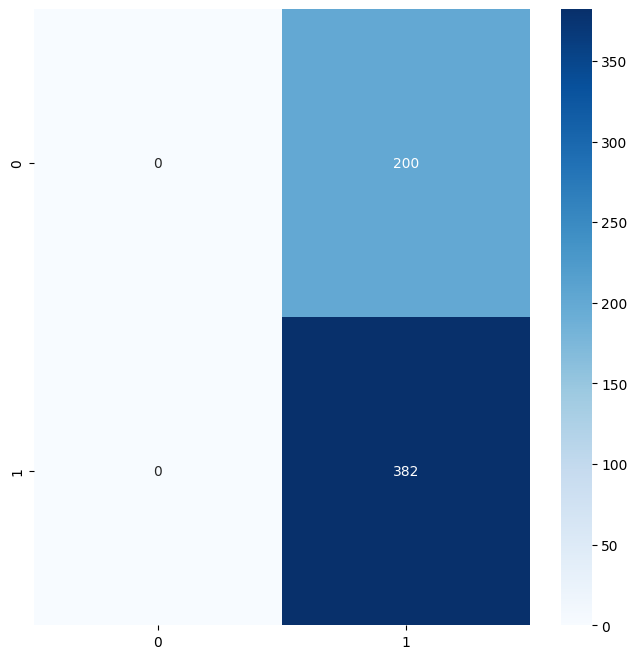

In [ ]:
# Visual confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_true = y_train,
                       y_pred = y_pred_dummy)

# Buat figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()


In [ ]:
# cek yang positif itu apa
dummy_clf.classes_[1] # not diabetes, ini adalah kelas 1 (positif)

'not diabetes'

In [ ]:
dummy_clf.classes_[0] # diabetes, ini adalah kelas 0 (negatif)

'diabetes'

In [20]:
# Cari score
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_dummy)

# Sama seperti proporsi kelas terbesar

0.6563573883161512

In [ ]:
# Dummy Classifier dengan strategi stratified
dummy_clf = DummyClassifier(strategy = "stratified",
                            random_state = 123)

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(random_state=123, strategy='stratified')

In [30]:
# predict
y_pred_dummy = dummy_clf.predict(X_train)

# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                y_pred = y_pred_dummy)

array([[ 66, 134],
       [128, 254]])

**Cara Mengubah Data Kategorikal ke Numerik**
- Possible value: {`not diabetes`, `diabetes`}
- Strateginya: Label Encoding, ubah not diabetes -> 0, diabetes -> 1

In [31]:
# Convert y_train & y_test
y_train = y_train.apply(lambda x: 1 if x == "diabetes" else 0)
y_test = y_test.apply(lambda x: 1 if x == "diabetes" else 0)

In [32]:
y_train.value_counts(normalize=True)

Outcome
0    0.656357
1    0.343643
Name: proportion, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler

# Buat scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transform data train & test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Import library
from sklearn.linear_model import LogisticRegression

# Buat weight class
n_samples = len(y_train)
n_classes = len(y_train.value_counts())
n_samples_j = y_train.value_counts()

class_weight = n_samples / (n_classes * n_samples_j)
class_weight

# Kita kasih weight yang lebih besar untuk kelas 1

Outcome
0    0.76178
1    1.45500
Name: count, dtype: float64

In [37]:
# Buat objek
logreg = LogisticRegression(class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 123)

In [38]:
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

In [39]:
# Lakukan Fitting Data
logreg_cv.fit(X = X_train_scaled,
              y = y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: np.float64(0.7617801047120419),
                                                        1: np.float64(1.455)},
                                          random_state=123,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [40]:
# Best params
logreg_cv.best_params_

{'C': np.float64(0.5455594781168515), 'penalty': 'l1'}

In [44]:
# Buat best model
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=np.float64(0.5455594781168515),
                   class_weight={0: np.float64(0.7617801047120419),
                                 1: np.float64(1.455)},
                   penalty='l1', random_state=123, solver='liblinear')

In [41]:
# Buat prediksi probability
y_pred_train_proba = logreg_cv.predict_proba(X_train_scaled)
y_pred_train_proba

# [1 - P(y = 1), P(y = 1)]

array([[0.05962135, 0.94037865],
       [0.85225979, 0.14774021],
       [0.66425899, 0.33574101],
       ...,
       [0.23035483, 0.76964517],
       [0.91901121, 0.08098879],
       [0.88771835, 0.11228165]], shape=(582, 2))

In [45]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_train

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [46]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

array([[287,  95],
       [ 66, 134]])

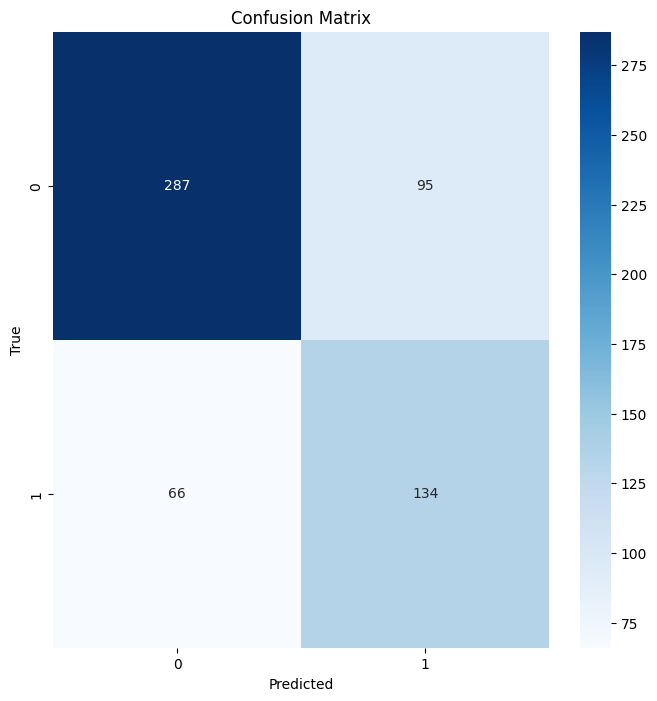

In [48]:
# figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(confusion_matrix(y_true = y_train,
                              y_pred = y_pred_train),
            annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()

In [47]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["not diabetes", "diabetes"]))

              precision    recall  f1-score   support

not diabetes       0.81      0.75      0.78       382
    diabetes       0.59      0.67      0.62       200

    accuracy                           0.72       582
   macro avg       0.70      0.71      0.70       582
weighted avg       0.73      0.72      0.73       582



In [49]:
y_pred_test = logreg.predict(X_test_scaled)

# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

array([[66, 30],
       [15, 35]])

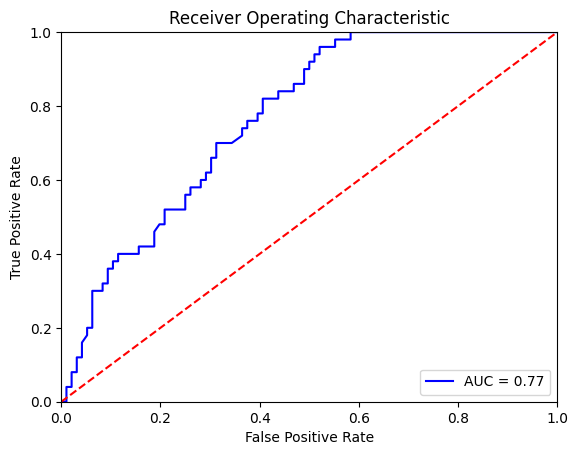

In [51]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_test_proba = logreg.predict_proba(X_test_scaled)
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_test_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
# Koefisien/slope logistic regression
logreg.coef_

array([[1.19139131, 0.21313067]])

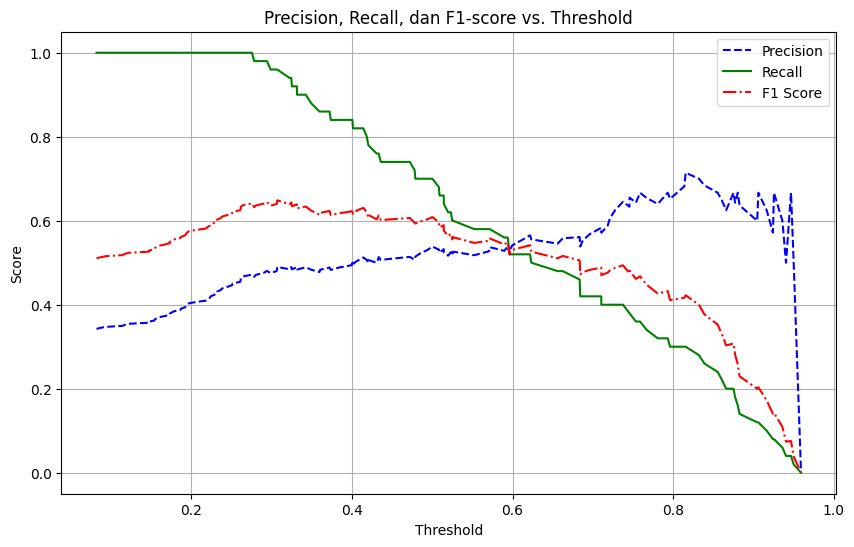

Threshold default: 0.5
Threshold optimal berdasarkan F1-score: 0.3072
F1-score optimal: 0.6486

--- Perbandingan Metrik ---
Accuracy (threshold=0.5): 0.6918
Accuracy (threshold=0.3072): 0.6438
Recall (threshold=0.5): 0.7000
Recall (threshold=0.3072): 0.9600
Precision (threshold=0.5): 0.5385
Precision (threshold=0.3072): 0.4898


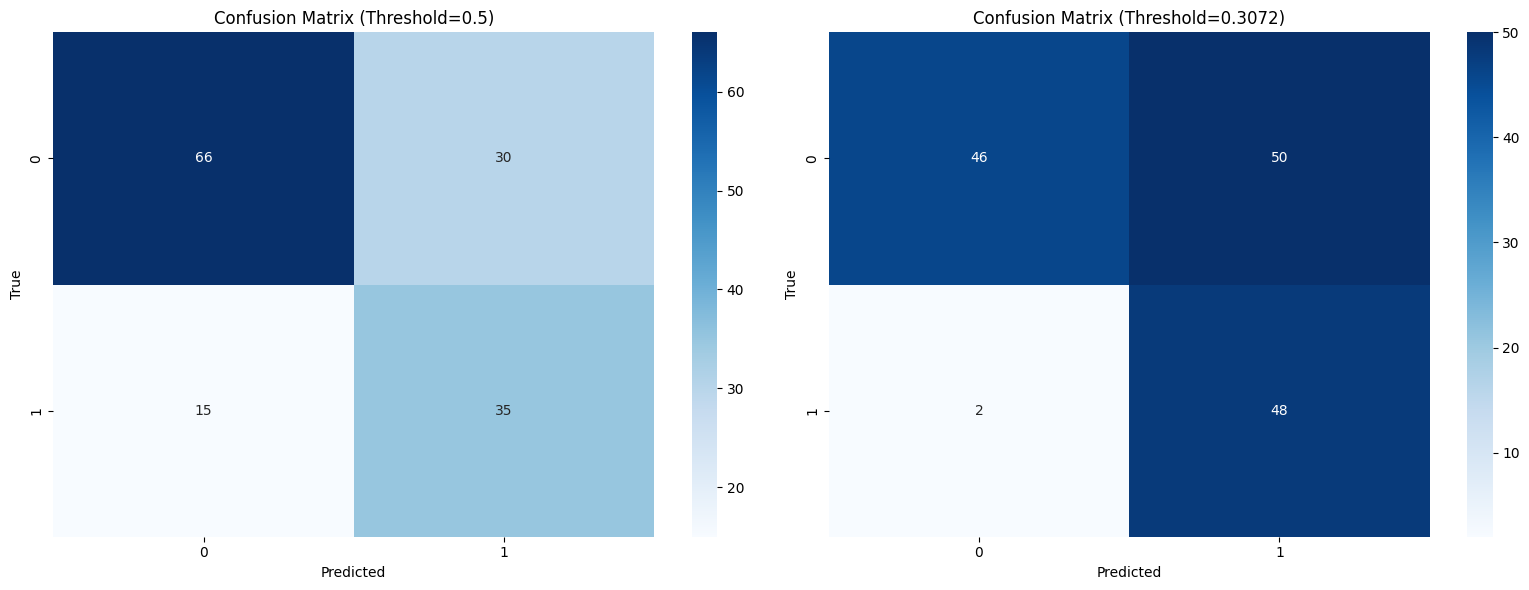


--- Classification Report dengan Threshold Default (0.5) ---
              precision    recall  f1-score   support

not diabetes       0.81      0.69      0.75        96
    diabetes       0.54      0.70      0.61        50

    accuracy                           0.69       146
   macro avg       0.68      0.69      0.68       146
weighted avg       0.72      0.69      0.70       146


--- Classification Report dengan Threshold Optimal ---
              precision    recall  f1-score   support

not diabetes       0.96      0.48      0.64        96
    diabetes       0.49      0.96      0.65        50

    accuracy                           0.64       146
   macro avg       0.72      0.72      0.64       146
weighted avg       0.80      0.64      0.64       146



In [54]:
# Threshold Tuning untuk Model Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Mendapatkan probabilitas prediksi
y_pred_test_proba = logreg.predict_proba(X_test_scaled)
y_scores = y_pred_test_proba[:, 1]  # Probabilitas untuk kelas positif (diabetes)

# Menghitung precision dan recall untuk berbagai threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Menghitung F1 score untuk setiap threshold
f1_scores = []
for i in range(len(precision)):
    if precision[i] + recall[i] > 0:  # Hindari pembagian dengan nol
        f1 = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
        f1_scores.append(f1)
    else:
        f1_scores.append(0)

# Plotting precision, recall, dan F1-score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-.', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, dan F1-score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Mencari threshold dengan F1-score tertinggi
optimal_idx = np.argmax(f1_scores[:-1])
optimal_threshold = thresholds[optimal_idx]
best_f1 = f1_scores[optimal_idx]

print(f"Threshold default: 0.5")
print(f"Threshold optimal berdasarkan F1-score: {optimal_threshold:.4f}")
print(f"F1-score optimal: {best_f1:.4f}")

# Evaluasi model dengan threshold optimal
y_pred_test_optimal = (y_scores >= optimal_threshold).astype(int)

# Perbandingan metrik dengan threshold default dan optimal
default_pred = logreg.predict(X_test_scaled)
print("\n--- Perbandingan Metrik ---")
print(f"Accuracy (threshold=0.5): {accuracy_score(y_test, default_pred):.4f}")
print(f"Accuracy (threshold={optimal_threshold:.4f}): {accuracy_score(y_test, y_pred_test_optimal):.4f}")
print(f"Recall (threshold=0.5): {recall_score(y_test, default_pred):.4f}")
print(f"Recall (threshold={optimal_threshold:.4f}): {recall_score(y_test, y_pred_test_optimal):.4f}")
print(f"Precision (threshold=0.5): {precision_score(y_test, default_pred):.4f}")
print(f"Precision (threshold={optimal_threshold:.4f}): {precision_score(y_test, y_pred_test_optimal):.4f}")

# Tampilkan confusion matrix dengan threshold optimal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(confusion_matrix(y_test, default_pred), annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_xlabel("Predicted")
ax1.set_ylabel("True")
ax1.set_title(f"Confusion Matrix (Threshold=0.5)")

sns.heatmap(confusion_matrix(y_test, y_pred_test_optimal), annot=True, fmt="d", cmap="Blues", ax=ax2)
ax2.set_xlabel("Predicted")
ax2.set_ylabel("True")
ax2.set_title(f"Confusion Matrix (Threshold={optimal_threshold:.4f})")

plt.tight_layout()
plt.show()

# Tampilkan classification report dengan threshold optimal
print("\n--- Classification Report dengan Threshold Default (0.5) ---")
print(classification_report(y_test, default_pred, target_names=["not diabetes", "diabetes"]))

print("\n--- Classification Report dengan Threshold Optimal ---")
print(classification_report(y_test, y_pred_test_optimal, target_names=["not diabetes", "diabetes"]))